In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Question 1)

part a)

In [15]:

# Generate fake data

slope = 1
offset = 0.25
time = np.linspace(0, 10, 10)
data = np.random.normal(slope * time + offset, 1)
sigma = 1 * np.random.normal(np.ones(len(data)), 0.01)



/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_16353/2051419341.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(time, data, yerr=sigma, fmt='o', ecolor='r', capthick=1, capsize=3, linestyle='None', marker='o', color='b', label='Data')


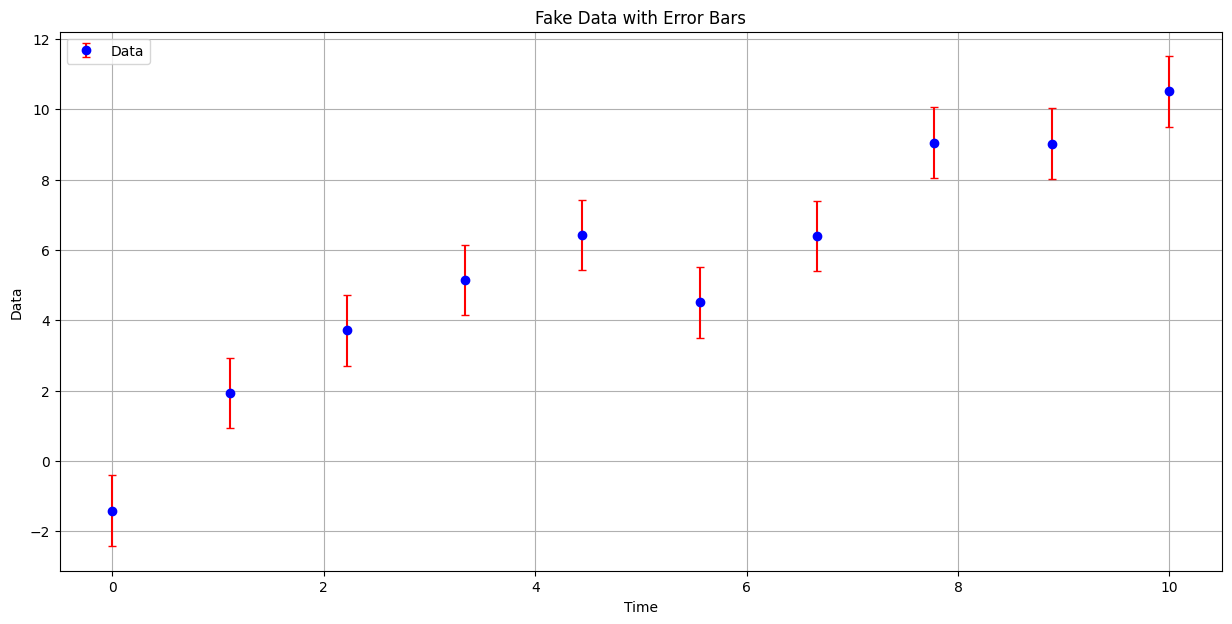

In [16]:
# Plot the data with error bars
plt.figure(figsize=(15, 7))
plt.errorbar(time, data, yerr=sigma, fmt='o', ecolor='r', capthick=1, capsize=3, linestyle='None', marker='o', color='b', label='Data')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Fake Data with Error Bars')
plt.legend()
plt.grid(True)
plt.show()

part b)

In [17]:


# Define linear function
def linear_func(x, a, b):
    return b * x + a

# Define quadratic function
def quadratic_func(x, a, b, c):
    return c * x**2 + b * x + a

# Fit linear function
popt_linear, pcov_linear = curve_fit(linear_func, time, data, sigma=sigma)

# Fit quadratic function
popt_quadratic, pcov_quadratic = curve_fit(quadratic_func, time, data, sigma=sigma)

# Generate points for the best fit lines
fit_linear = linear_func(time, *popt_linear)
fit_quadratic = quadratic_func(time, *popt_quadratic)


/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_16353/2941747160.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(time, data, yerr=sigma, fmt='o', ecolor='r', capthick=1, capsize=3, linestyle='None', marker='o', color='b', label='Data')


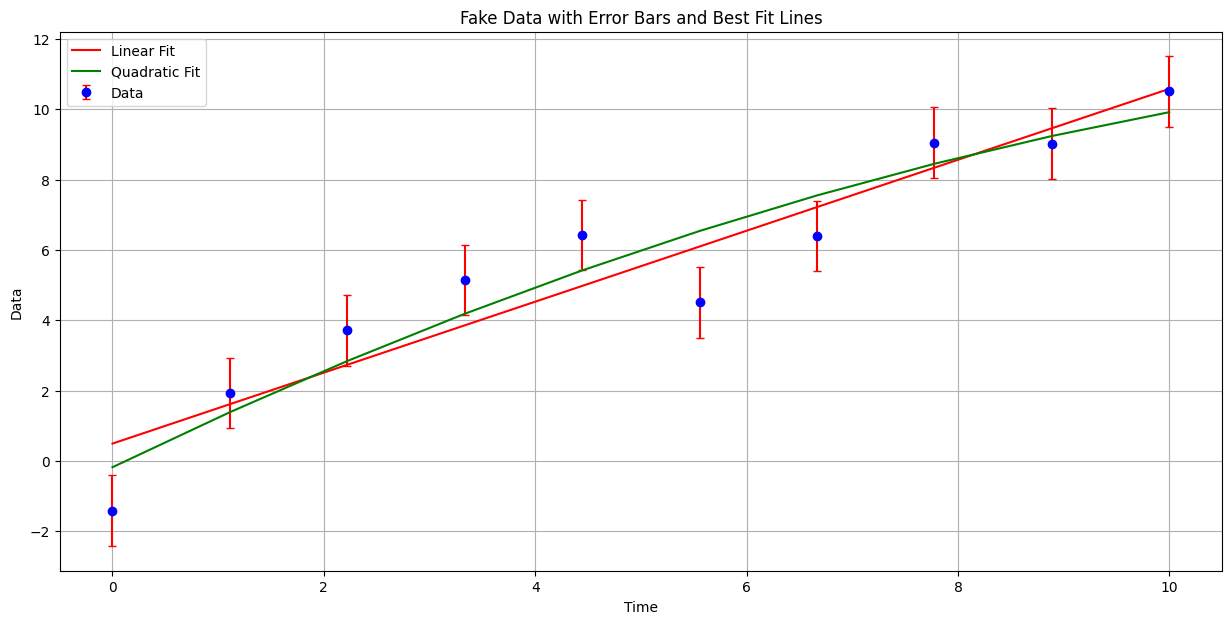

In [19]:
plt.figure(figsize=(15, 7))
plt.errorbar(time, data, yerr=sigma, fmt='o', ecolor='r', capthick=1, capsize=3, linestyle='None', marker='o', color='b', label='Data')
plt.plot(time, fit_linear, label='Linear Fit', color='red')
plt.plot(time, fit_quadratic, label='Quadratic Fit', color='green')
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Fake Data with Error Bars and Best Fit Lines')
plt.legend()
plt.grid(True)
plt.show()


part c)

In [9]:
# degrees of freedom
nu_linear = len(time) - 2  # For linear fit, 2 parameters: a and b
nu_quadratic = len(time) - 3  # For quadratic fit, 3 parameters: a, b, and c

# chi-square for linear fit
chi_sq_lin = np.sum(((data - fit_linear) / sigma) ** 2)

# chi-square for quadratic fit
chi_sq_quad = np.sum(((data - fit_quadratic) / sigma) ** 2)

# chi-square
chi_final_linear = chi_sq_lin / nu_linear
chi_final_quad = chi_sq_quad / nu_quadratic

print("Reduced chi-square for linear fit:", chi_final_linear)
print("Reduced chi-square for quadratic fit:", chi_final_quad)


Reduced chi-square for linear fit: 0.7104723697223793
Reduced chi-square for quadratic fit: 0.610909428908286


Question 3)

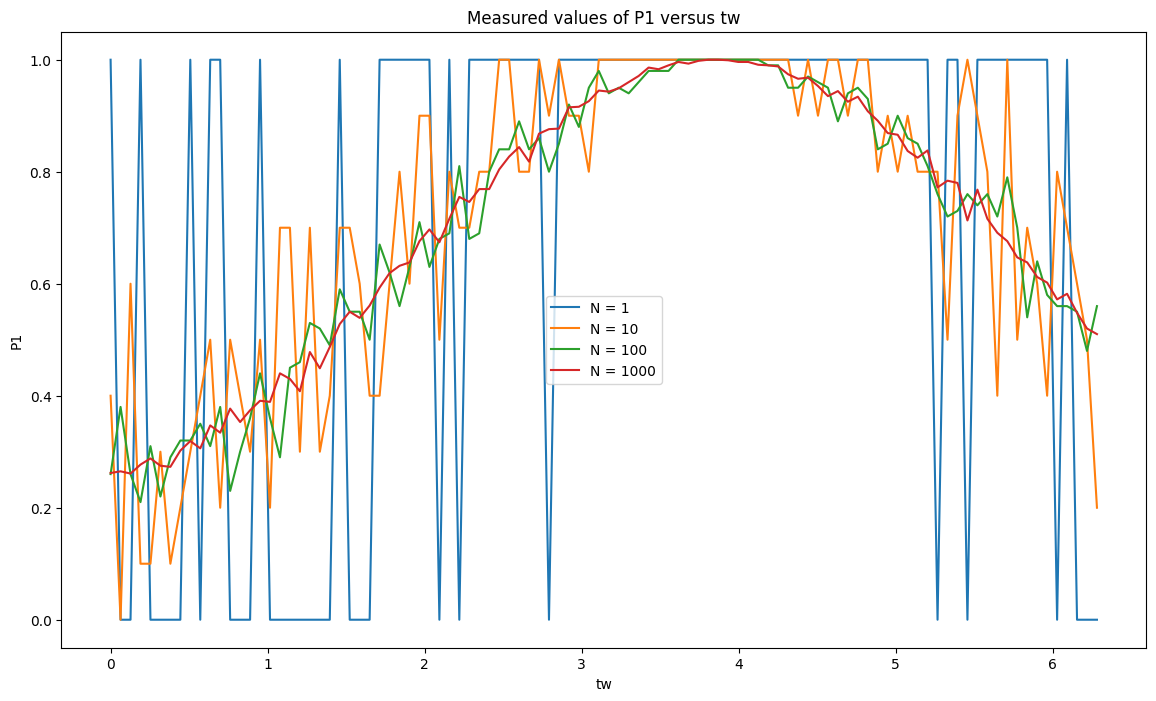

In [22]:
Omega = 2 * np.pi 
delta = np.pi / 4 
Omega_prime = np.sqrt(Omega**2 + delta**2)
tp = np.pi 

# P1 for the qubit in state |1>
def probability_p1(tp, tw, Omega, delta, Omega_prime):
    return 1 - (Omega**2 / Omega_prime**4) * (
        (Omega_prime * np.cos(delta * tw / 2) * np.sin(Omega_prime * tp)) - 
        2 * delta * np.sin(delta * tw / 2) * np.sin(Omega * tp / 2)**2
    )**2

# function to simulate the binomial distribution for P1
def simulate_p1(tp, tw, Omega, delta, Omega_prime, N):
    p1 = probability_p1(tp, tw, Omega, delta, Omega_prime)
    # Generate data from a binomial distribution
    data = np.random.binomial(n=N, p=p1) / N  # to get the probability estimate from N trials
    return data

N_values = [1, 10, 100, 1000]

tw_values = np.linspace(0, 2 * np.pi, 100)  # tw will vary from 0 to 2*pi

# initialize a dictionary to hold the simulated data for each N
simulated_data = {N: [] for N in N_values}

# generate the simulated data for each N and tw value
for N in N_values:
    for tw in tw_values:
        simulated_data[N].append(simulate_p1(tp, tw, Omega, delta, Omega_prime, N))

plt.figure(figsize=(14, 8))

for N in N_values:
    plt.plot(tw_values, simulated_data[N], label=f'N = {N}')

plt.title('Measured values of P1 versus tw')
plt.xlabel('tw')
plt.ylabel('P1')
plt.legend()
plt.show()